In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


### Loading Data and Basic Overview

In [2]:
# Import necessary libraries
import pandas as pd

df = pd.read_csv('AAPL.csv')
# Display the first few rows of the data to get an overview
df.head()




,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-21,8.315000,8.732143,8.262500,8.654286,7.316792,1223891200
1,2010-05-24,8.831429,8.960714,8.795000,8.812857,7.450853,754238800
2,2010-05-25,8.548214,8.812857,8.470000,8.757857,7.404354,1048006400
3,2010-05-26,8.931429,9.004643,8.705357,8.718214,7.370838,850654000
4,2010-05-27,8.950000,9.067500,8.896786,9.048214,7.649839,666282400


In [3]:
# Display the summary statistics of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3.524000e+03
mean,64.620547,65.304178,63.968341,64.663837,62.532961,2.259134e+08
std,58.052704,58.681022,57.472128,58.104738,58.481597,2.055276e+08
min,8.315000,8.664643,8.262500,8.568929,7.244626,1.775881e+07
25%,21.078572,21.236161,20.818571,20.994732,17.937954,8.845050e+07
50%,36.263751,36.542499,35.963749,36.395001,34.068474,1.426150e+08
75%,120.352499,121.952501,118.875000,120.544998,118.141355,3.002522e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,1.880998e+09


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3524 non-null   object 
 1   Open       3524 non-null   float64
 2   High       3524 non-null   float64
 3   Low        3524 non-null   float64
 4   Close      3524 non-null   float64
 5   Adj Close  3524 non-null   float64
 6   Volume     3524 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.8+ KB
None


In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

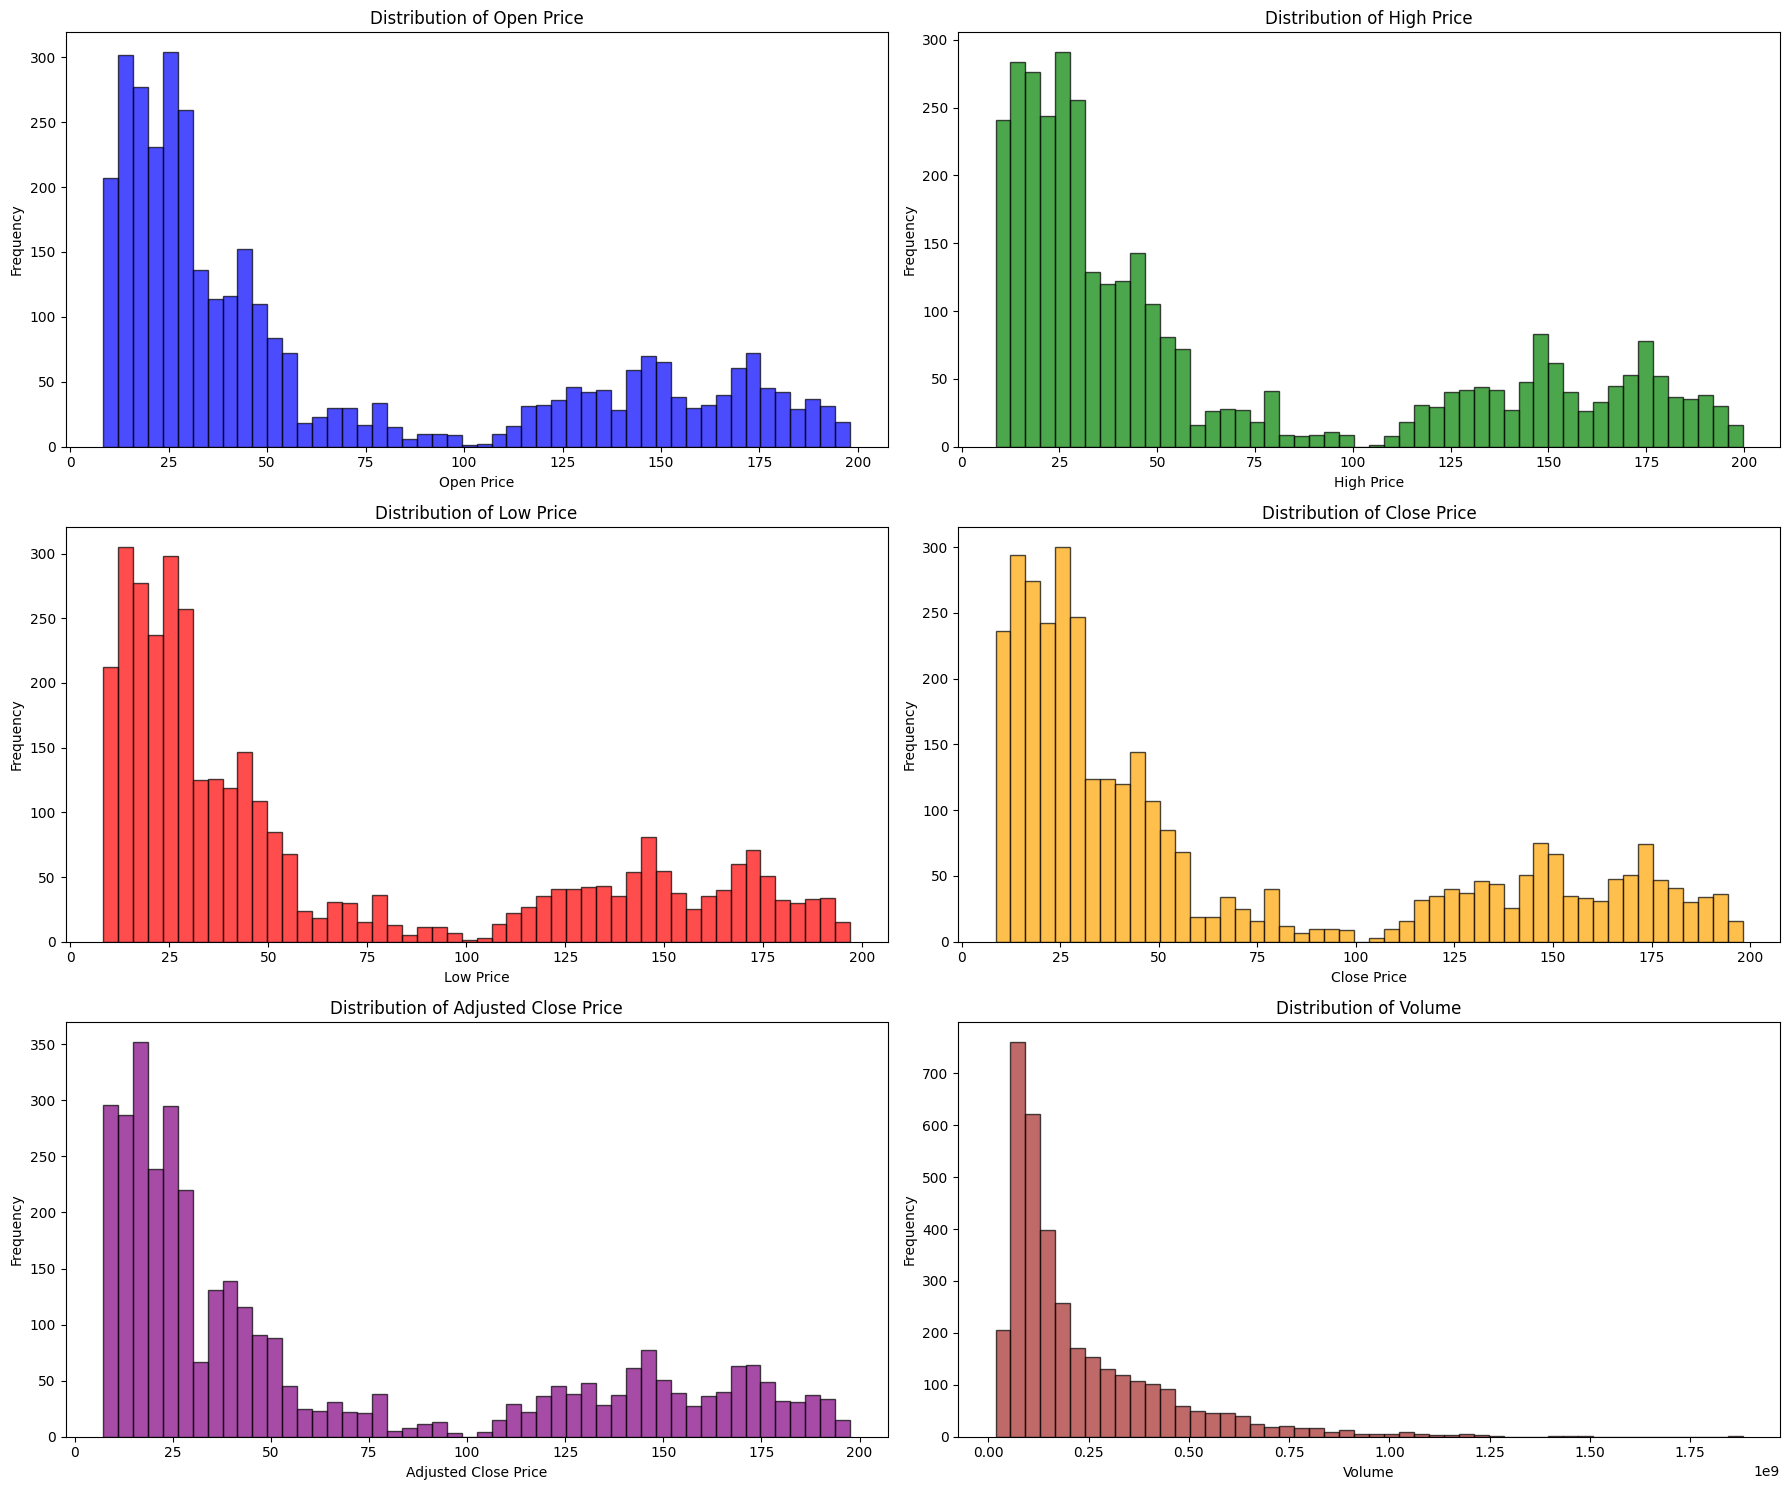

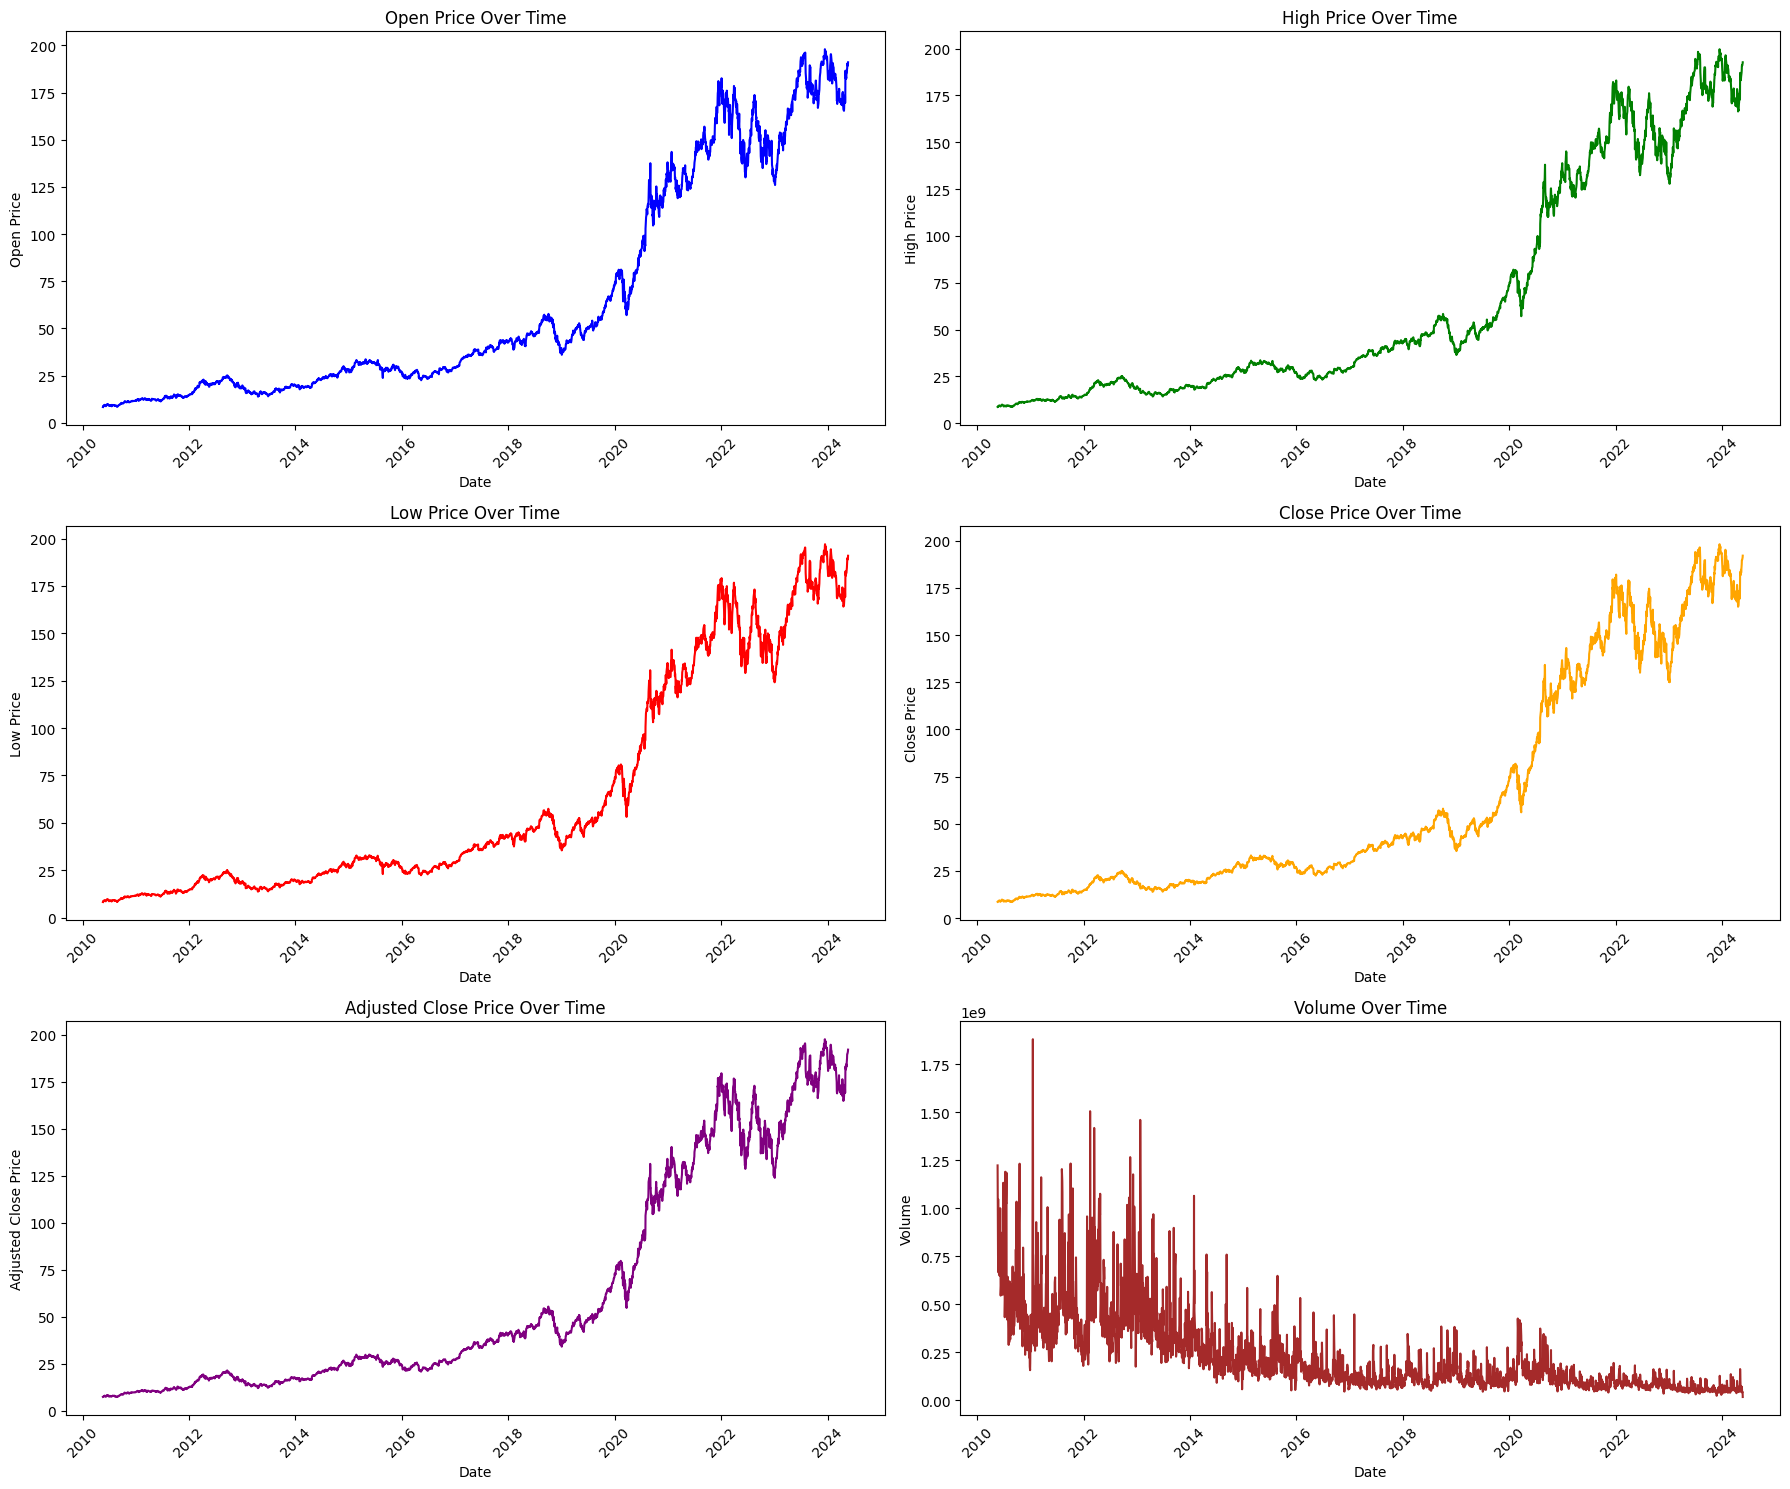

In [12]:

# Plotting data distribution for each category using histograms and line plots

# Create a figure and set size for better visualization
plt.figure(figsize=(18, 15))

# Plot 'Open' price distribution
plt.subplot(3, 2, 1)
plt.hist(df['Open'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Distribution of Open Price')

# Plot 'High' price distribution
plt.subplot(3, 2, 2)
plt.hist(df['High'], bins=50, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.title('Distribution of High Price')

# Plot 'Low' price distribution
plt.subplot(3, 2, 3)
plt.hist(df['Low'], bins=50, alpha=0.7, color='red', edgecolor='black')
plt.xlabel('Low Price')
plt.ylabel('Frequency')
plt.title('Distribution of Low Price')

# Plot 'Close' price distribution
plt.subplot(3, 2, 4)
plt.hist(df['Close'], bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Close Price')

# Plot 'Adjusted Close' price distribution
plt.subplot(3, 2, 5)
plt.hist(df['Adj Close'], bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Adjusted Close Price')

# Plot 'Volume' distribution
plt.subplot(3, 2, 6)
plt.hist(df['Volume'], bins=50, alpha=0.7, color='brown', edgecolor='black')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Volume')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Visualizing trends over time with line plots for each category
plt.figure(figsize=(18, 15))

# Line plot for 'Open' prices over time
plt.subplot(3, 2, 1)
plt.plot(df['Date'], df['Open'], color='blue')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.xticks(rotation=45)
plt.title('Open Price Over Time')

# Line plot for 'High' prices over time
plt.subplot(3, 2, 2)
plt.plot(df['Date'], df['High'], color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.xticks(rotation=45)
plt.title('High Price Over Time')

# Line plot for 'Low' prices over time
plt.subplot(3, 2, 3)
plt.plot(df['Date'], df['Low'], color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.xticks(rotation=45)
plt.title('Low Price Over Time')

# Line plot for 'Close' prices over time
plt.subplot(3, 2, 4)
plt.plot(df['Date'], df['Close'], color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.title('Close Price Over Time')

# Line plot for 'Adjusted Close' prices over time
plt.subplot(3, 2, 5)
plt.plot(df['Date'], df['Adj Close'], color='purple')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.xticks(rotation=45)
plt.title('Adjusted Close Price Over Time')

# Line plot for 'Volume' over time
plt.subplot(3, 2, 6)
plt.plot(df['Date'], df['Volume'], color='brown')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.title('Volume Over Time')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Correlation Matrix:
            Open     Close      High       Low    Volume
Open    1.000000  0.999775  0.999907  0.999893 -0.536303
Close   0.999775  1.000000  0.999892  0.999896 -0.536669
High    0.999907  0.999892  1.000000  0.999865 -0.535444
Low     0.999893  0.999896  0.999865  1.000000 -0.537687
Volume -0.536303 -0.536669 -0.535444 -0.537687  1.000000


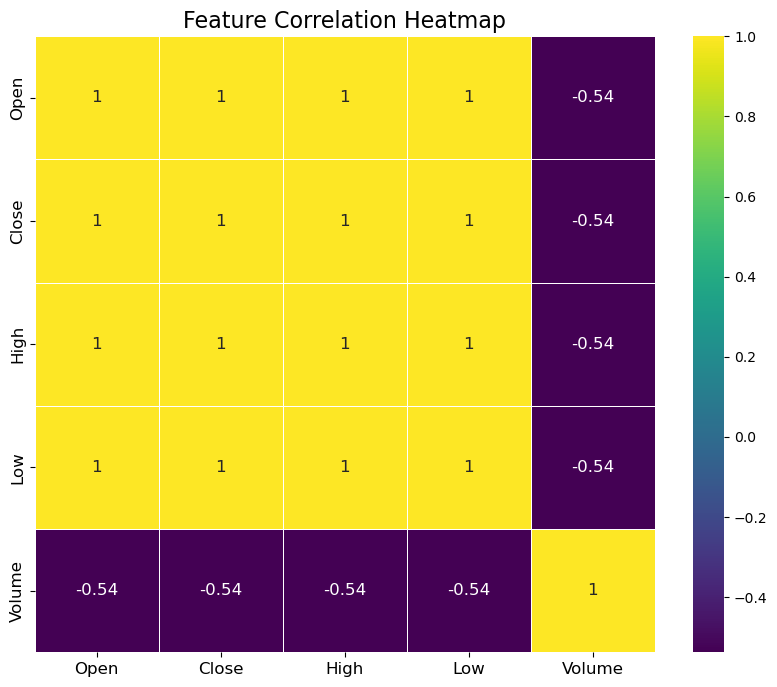

In [9]:

import seaborn as sns


# Calculate the correlation matrix for relevant features
correlation_matrix = df[['Open', 'Close', 'High', 'Low', 'Volume']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap with a beautiful color palette
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, linecolor='white', annot_kws={"size": 12})
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


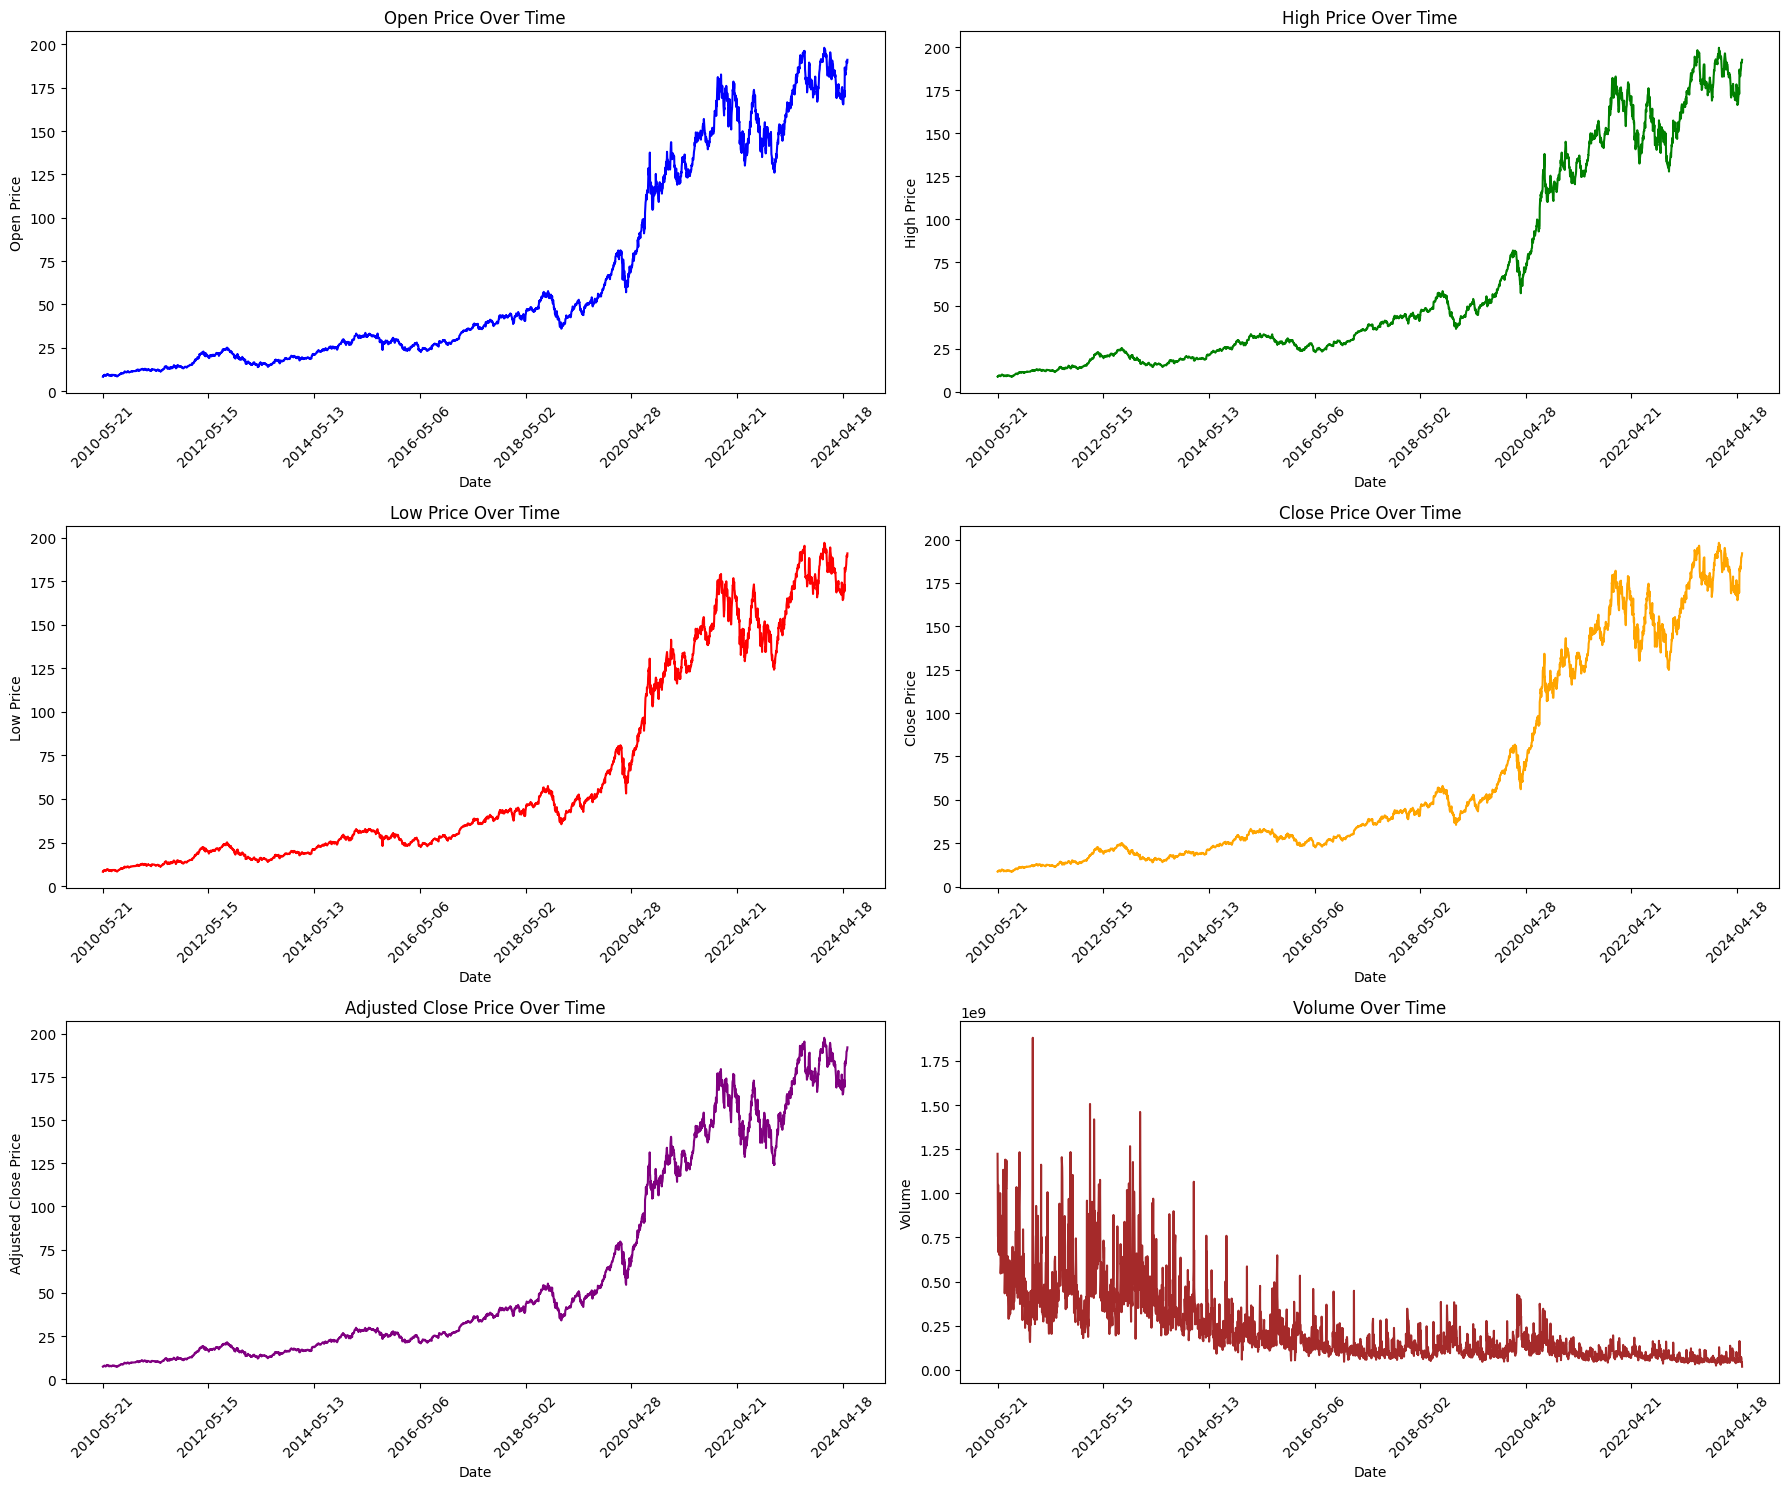

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('AAPL.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Visualizing trends over time with line plots for each category
plt.figure(figsize=(18, 15))

# Line plot for 'Open' prices over time
plt.subplot(3, 2, 1)
plt.plot(df['Date'], df['Open'], color='blue')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.xticks(df['Date'][::500], rotation=45)  # Use an interval of 500
plt.title('Open Price Over Time')

# Line plot for 'High' prices over time
plt.subplot(3, 2, 2)
plt.plot(df['Date'], df['High'], color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.xticks(df['Date'][::500], rotation=45)  # Use an interval of 500
plt.title('High Price Over Time')

# Line plot for 'Low' prices over time
plt.subplot(3, 2, 3)
plt.plot(df['Date'], df['Low'], color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.xticks(df['Date'][::500], rotation=45)  # Use an interval of 500
plt.title('Low Price Over Time')

# Line plot for 'Close' prices over time
plt.subplot(3, 2, 4)
plt.plot(df['Date'], df['Close'], color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(df['Date'][::500], rotation=45)  # Use an interval of 500
plt.title('Close Price Over Time')

# Line plot for 'Adjusted Close' prices over time
plt.subplot(3, 2, 5)
plt.plot(df['Date'], df['Adj Close'], color='purple')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.xticks(df['Date'][::500], rotation=45)  # Use an interval of 500
plt.title('Adjusted Close Price Over Time')

# Line plot for 'Volume' over time
plt.subplot(3, 2, 6)
plt.plot(df['Date'], df['Volume'], color='brown')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(df['Date'][::500], rotation=45)  # Use an interval of 500
plt.title('Volume Over Time')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Data Preprocessing (Scaling)

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Extract the relevant columns ('Open', 'Close', 'High', 'Low') as a NumPy array
data = df[['Open', 'Close', 'High', 'Low', 'Volume']].values

# Scale the data to a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Display the first 5 rows of scaled data
scaled_data[:5]


array([[0.00000000e+00, 4.50335113e-04, 3.53485772e-04, 0.00000000e+00,
        6.47330948e-01],
       [2.72227400e-03, 1.28694007e-03, 1.55047238e-03, 2.82137890e-03,
        3.95268624e-01],
       [1.22935081e-03, 9.96765493e-04, 7.76170966e-04, 1.09941056e-03,
        5.52933620e-01],
       [3.24940822e-03, 7.87612935e-04, 1.78052093e-03, 2.34641764e-03,
        4.47014637e-01],
       [3.34730232e-03, 2.52866038e-03, 2.10969211e-03, 3.36067819e-03,
        3.48062446e-01]])

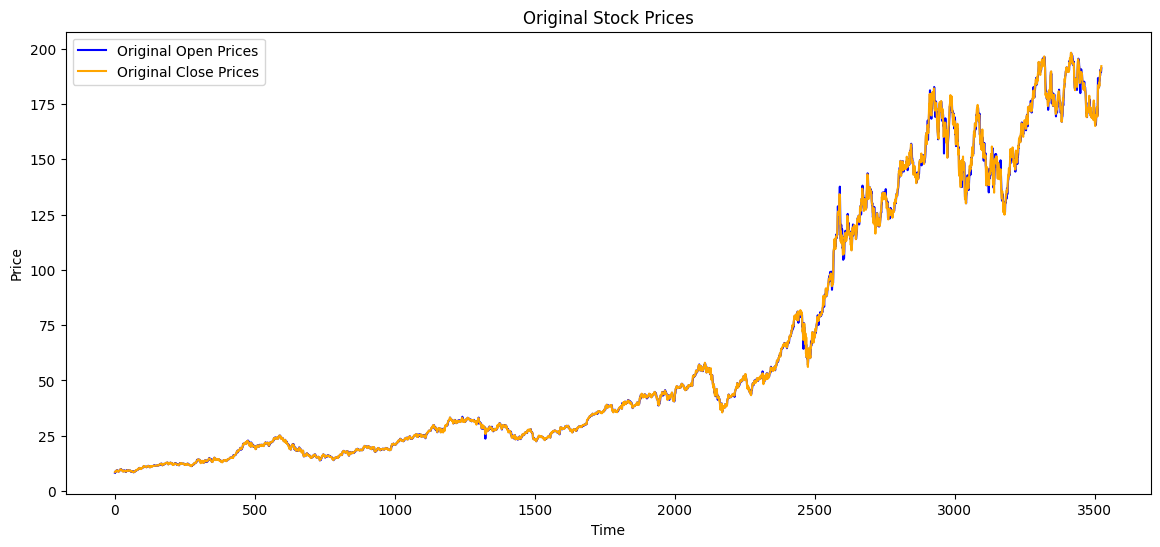

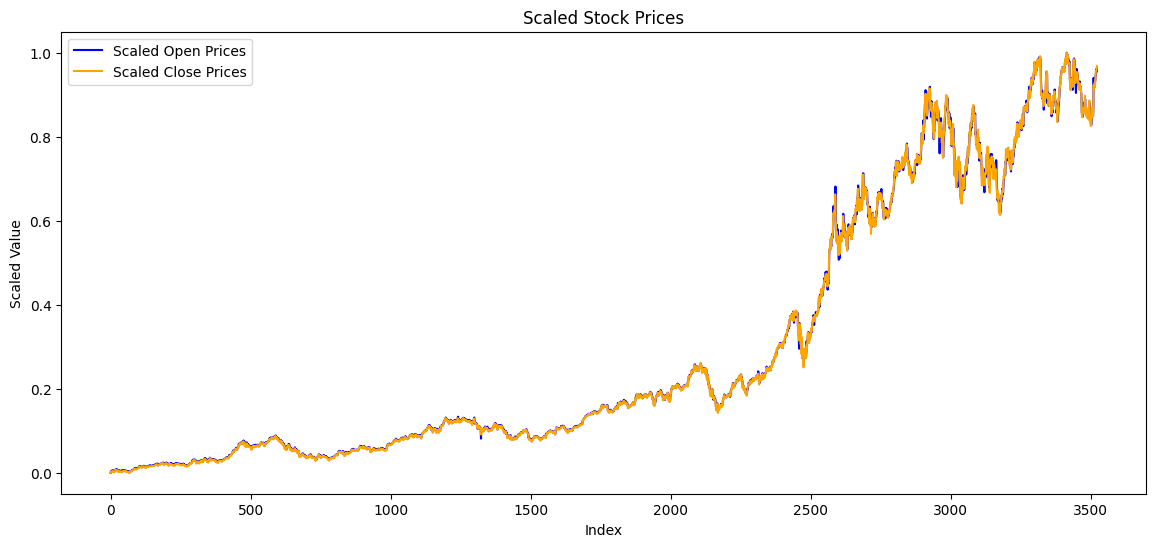

In [47]:
import matplotlib.pyplot as plt

# Plot original data
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Open'], label='Original Open Prices', color='blue')
plt.plot(df.index, df['Close'], label='Original Close Prices', color='orange')
plt.title('Original Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot scaled data (scaled Open and Close values)
plt.figure(figsize=(14, 6))
plt.plot(scaled_data[:, 0], label='Scaled Open Prices', color='blue')
plt.plot(scaled_data[:, 1], label='Scaled Close Prices', color='orange')
plt.title('Scaled Stock Prices')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()


### Creating Sequences for LSTM

In [48]:
import numpy as np

# Define sequence length (e.g., using the past 60 days to predict the next)
sequence_length = 2000

# Create sequences and the corresponding labels
X_data = []
y_data = []

for i in range(sequence_length, len(scaled_data)):
    # Extract the past 60 days of data
    X_data.append(scaled_data[i-sequence_length:i])  # Input sequence
    # Corresponding next day's 'Open', 'Close', 'High', 'Low' values
    y_data.append(scaled_data[i])

# Convert to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

# Display the shape of X_data and y_data
X_data.shape, y_data.shape


((1524, 2000, 5), (1524, 5))

### Splitting the Data into Training and Testing Sets

In [49]:
# Split the data into training and testing sets (80% train, 20% test)
split_index = int(len(X_data) * 0.8)
X_train, X_test = X_data[:split_index], X_data[split_index:]
y_train, y_test = y_data[:split_index], y_data[split_index:]

# Display the shapes of the training and testing sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((1219, 2000, 5), (1219, 5), (305, 2000, 5), (305, 5))

### Data Visualization

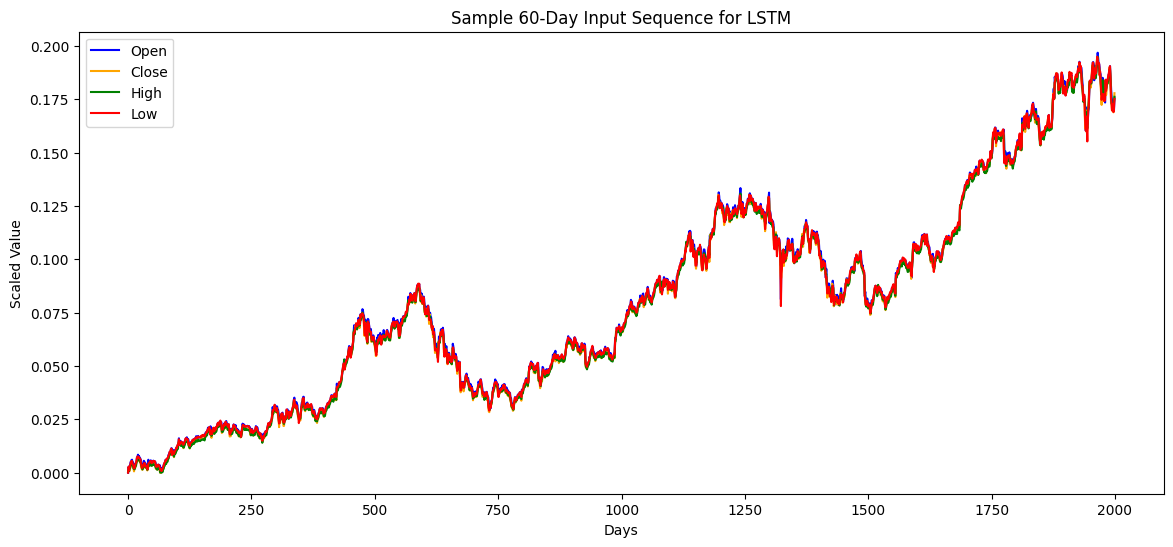

In [50]:
# Plot the first 60-day sequence (from X_train) to visualize the input for the model
plt.figure(figsize=(14, 6))
plt.plot(X_train[0][:, 0], label='Open', color='blue')
plt.plot(X_train[0][:, 1], label='Close', color='orange')
plt.plot(X_train[0][:, 2], label='High', color='green')
plt.plot(X_train[0][:, 3], label='Low', color='red')
# plt.plot(X_train[0][:, 4], label='Volume', color='magenta')
plt.title('Sample 60-Day Input Sequence for LSTM')
plt.xlabel('Days')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()


### Building the LSTM Model

In [51]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# # Build the LSTM model
# model = Sequential()

# # Add an LSTM layer with 50 units and return sequences to feed into subsequent LSTM layers
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# # Add another LSTM layer (without return_sequences as it's the last LSTM layer)
# model.add(LSTM(units=50))

# # Add a Dense layer with 4 outputs ('Open', 'Close', 'High', 'Low')
# model.add(Dense(units=5))

# # Display the model's architecture
# model.summary()



from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Build the LSTM model
model = Sequential()

# Add an LSTM layer with 64 units and dropout regularization
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Add another LSTM layer with 64 units and dropout
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

# Add a third LSTM layer without return_sequences as it's the last LSTM layer
model.add(LSTM(units=64))
model.add(Dropout(0.2))

# Add a Dense layer with 5 outputs ('Open', 'Close', 'High', 'Low', 'Volume')
model.add(Dense(units=5))


# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Display the model's architecture
model.summary()




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 2000, 64)          17920     
                                                                 
 dropout_6 (Dropout)         (None, 2000, 64)          0         
                                                                 
 lstm_10 (LSTM)              (None, 2000, 64)          33024     
                                                                 
 dropout_7 (Dropout)         (None, 2000, 64)          0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                

### Compiling the Model

In [52]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# # Compile the model with the Adam optimizer and mean_squared_error loss function
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])


### Training the Model

In [53]:
# # Train the model with 20% of the training data used for validation
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Explanation:
# - `epochs` specifies how many times to iterate over the entire training data.
# - `batch_size` defines the number of samples processed before updating the model's internal parameters.
# - `validation_split` is the fraction of training data used for validation.


Epoch 1/100
39/39 [==============================] - 209s 5s/step - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 2/100
39/39 [==============================] - 219s 6s/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 3/100
39/39 [==============================] - 208s 5s/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 4/100
39/39 [==============================] - 221s 6s/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 5/100
39/39 [==============================] - 216s 6s/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 6/100
39/39 [==============================] - 219s 6s/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 7/100
39/39 [=========

### Evaluating the Model on Test Data

In [54]:
# Evaluate the model on the test set
test_loss, test_mse = model.evaluate(X_test, y_test)


# Display the test loss and mean squared error
print(f"Test Loss (Mean Squared Error): {test_loss}")


10/10 [==============================] - 17s 2s/step - loss: 7.0807e-04 - mean_squared_error: 7.0807e-04
Test Loss (Mean Squared Error): 0.0007080663344822824


### Plotting Training and Validation Accuracy

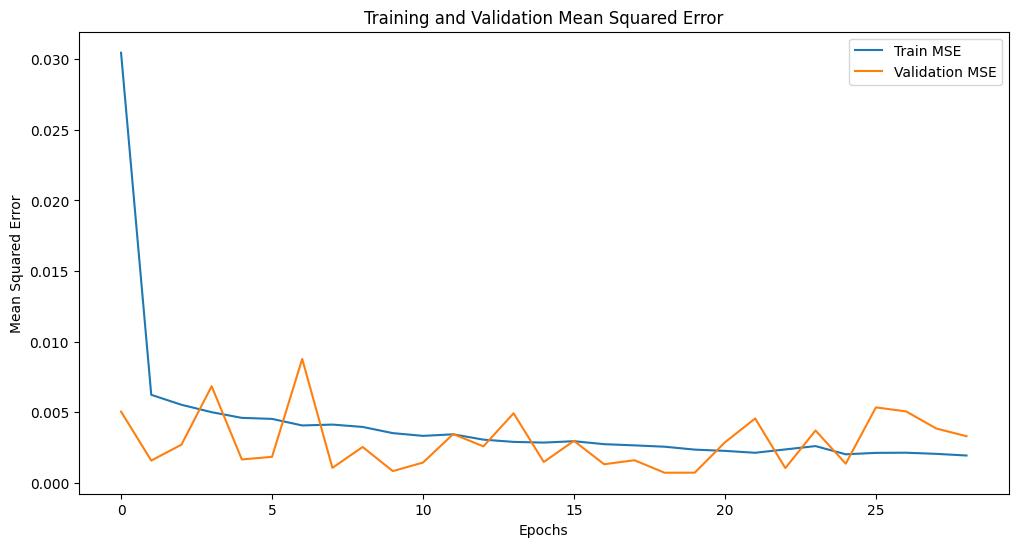

In [55]:
# Plotting Mean Squared Error (MSE) during training
plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Training and Validation Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


### Plotting Training and Validation Loss

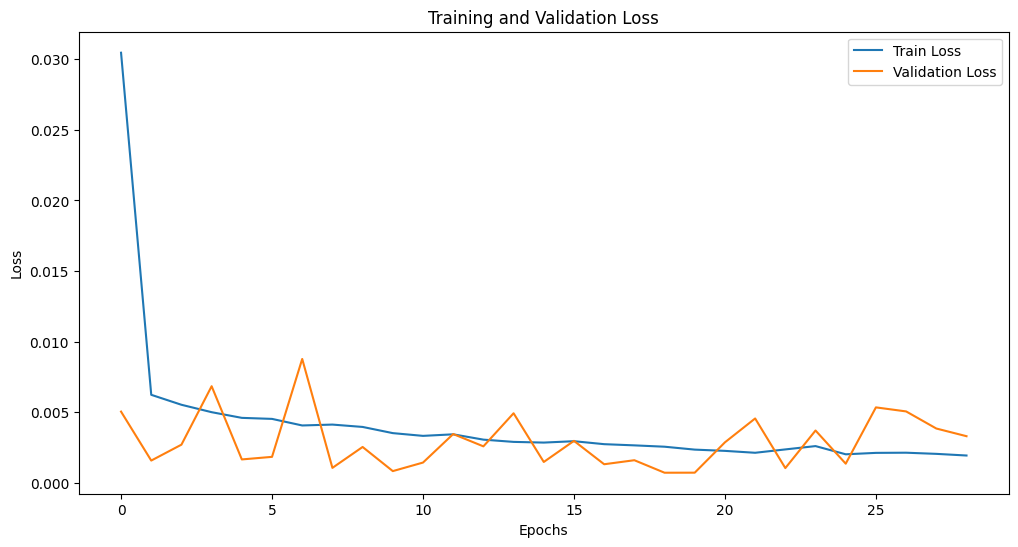

In [56]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Predicting on Test Data and Inverse Transforming

48/48 [==============================] - 89s 2s/step


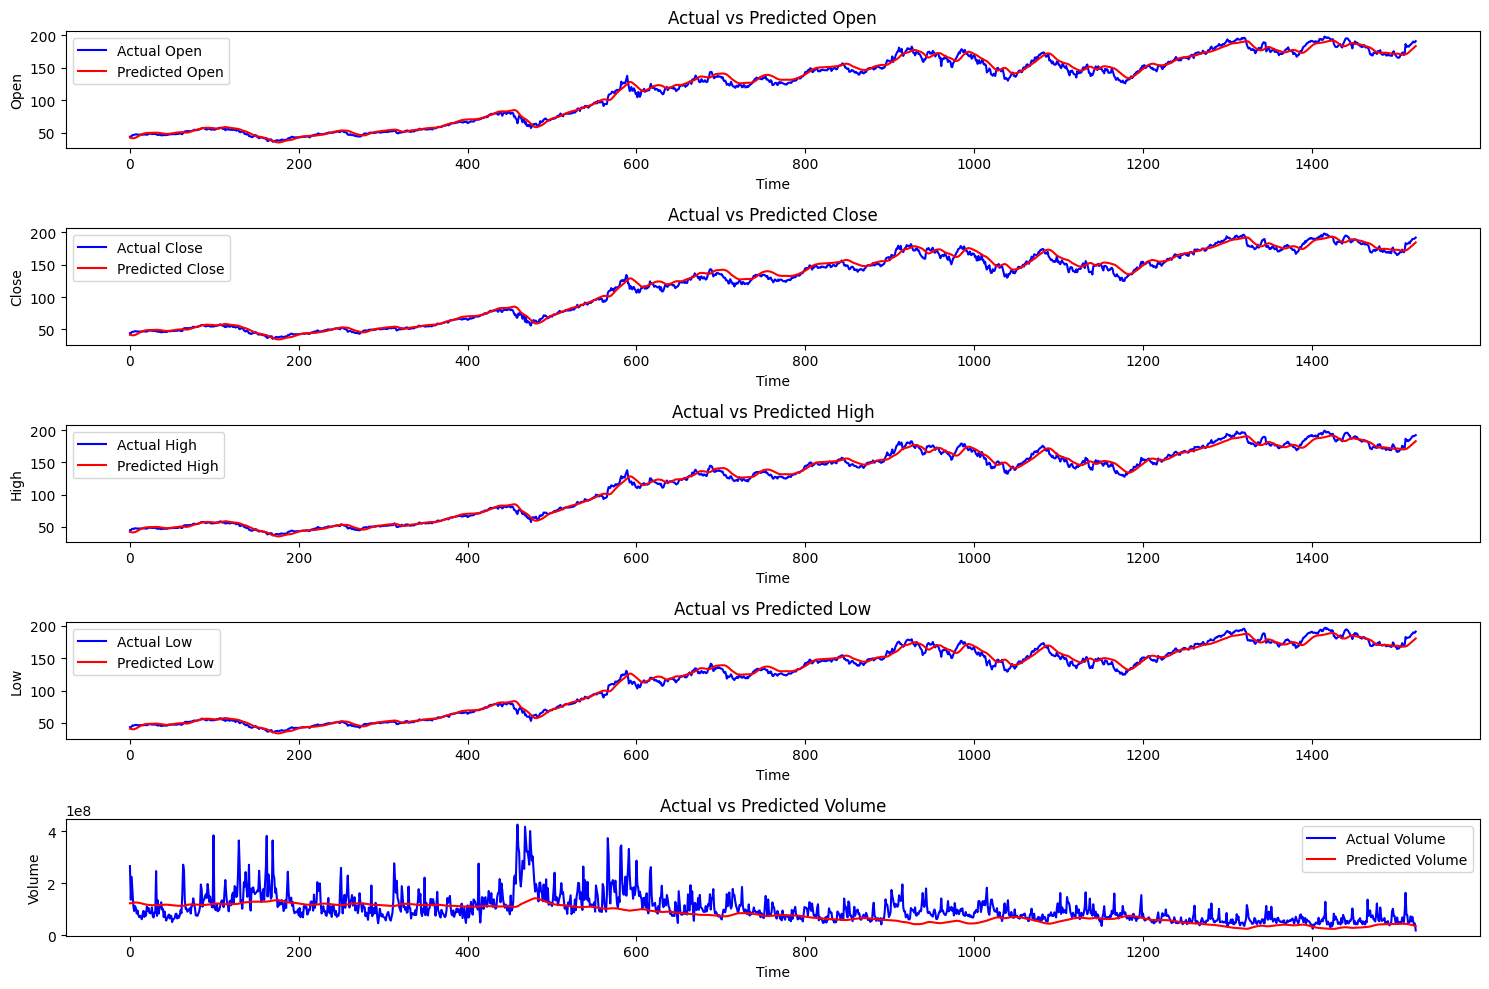

In [57]:
# Make predictions on all data
all_data_scaled = scaled_data.copy()  # This is the scaled version of all data used for prediction
X_all = []

# Create sequences for the entire dataset
for i in range(sequence_length, len(all_data_scaled)):
    X_all.append(all_data_scaled[i-sequence_length:i])  # Past 60 days data

# Convert to numpy array
X_all = np.array(X_all)

# Predicting the entire dataset
predictions = model.predict(X_all)

# Since the scaler was used on all the columns together, we need to inverse transform the data
# (both the actual and predicted values)
all_data_inverse = scaler.inverse_transform(all_data_scaled[sequence_length:])
predictions_inverse = scaler.inverse_transform(predictions)

# Plotting actual vs predicted for each feature ('Open', 'Close', 'High', 'Low', 'Volume')

features = ['Open', 'Close', 'High', 'Low', 'Volume']
plt.figure(figsize=(15, 10))

# Iterate through each feature to plot
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    plt.plot(all_data_inverse[:, i], label=f'Actual {feature}', color='blue')
    plt.plot(predictions_inverse[:, i], label=f'Predicted {feature}', color='red')
    plt.title(f'Actual vs Predicted {feature}')
    plt.xlabel('Time')
    plt.ylabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 234ms/step


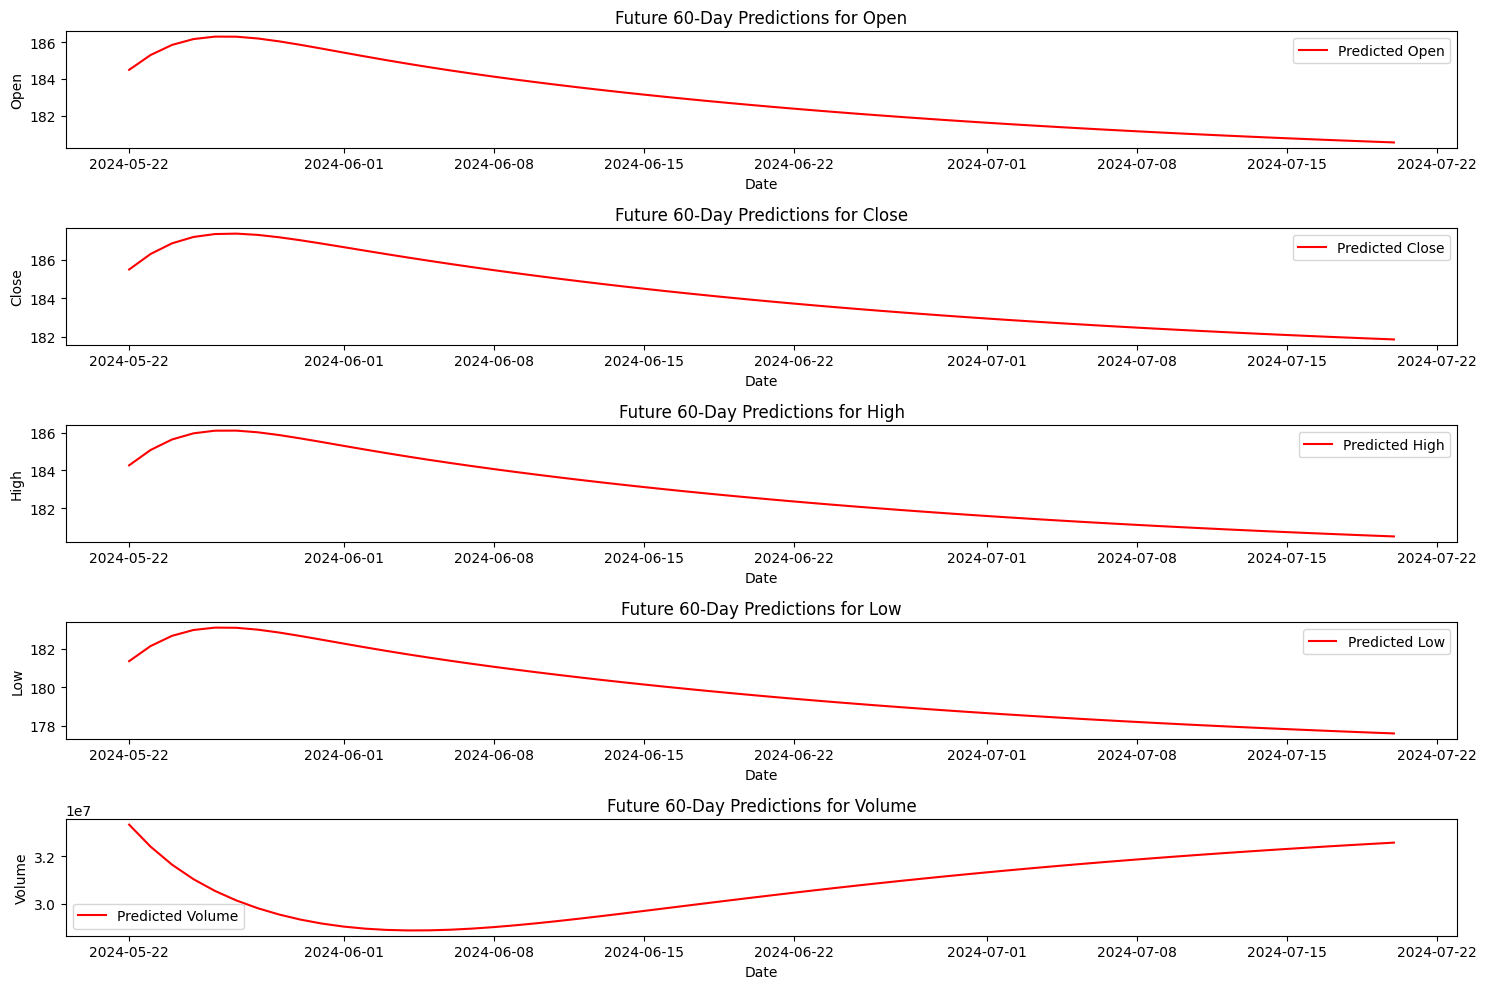

Future predictions have been saved to: future_predictions.csv


In [212]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Last 60 days of data to start the prediction
last_sequence = scaled_data[-sequence_length:].copy()

# Store future predictions
future_predictions = []

# Predict the next 60 days
for _ in range(60):
    # Reshape the input to match the LSTM model's expected input
    last_sequence_reshaped = np.reshape(last_sequence, (1, sequence_length, last_sequence.shape[1]))
    
    # Predict the next day
    predicted_next_day = model.predict(last_sequence_reshaped)
    
    # Append the predicted day to future_predictions
    future_predictions.append(predicted_next_day[0])
    
    # Update the last_sequence by removing the first day and adding the predicted next day
    last_sequence = np.vstack((last_sequence[1:], predicted_next_day))

# Convert future predictions to original scale
future_predictions_inverse = scaler.inverse_transform(future_predictions)

# Generate future dates starting from the day after the last date in the dataset
last_date = datetime.strptime('2024-05-21', '%Y-%m-%d')
future_dates = [last_date + timedelta(days=i + 1) for i in range(60)]

# Create DataFrame for future predictions
future_df = pd.DataFrame(future_predictions_inverse, columns=['Open', 'Close', 'High', 'Low', 'Volume'])
future_df['date'] = future_dates

# Reorder columns to match the specified order
future_df = future_df[['date', 'Open', 'Close', 'High', 'Low', 'Volume']]

# Save the future predictions to CSV
csv_filename = 'future_predictions.csv'
future_df.to_csv(csv_filename, index=False)

# Plotting future predictions for each feature
features = ['Open', 'Close', 'High', 'Low', 'Volume']
plt.figure(figsize=(15, 10))

# Iterate through each feature to plot
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    plt.plot(future_dates, future_df[feature], label=f'Predicted {feature}', color='red')
    plt.title(f'Future 60-Day Predictions for {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()

# Display the saved file path
print(f"Future predictions have been saved to: {csv_filename}")


In [118]:
# import pandas as pd
# import numpy as np

# # Assuming future_df already exists with columns 'date', 'Open', 'Close', 'High', 'Low', and 'Volume'

# # Step 1: Calculate the mid between Open and Close, and between High and Low
# future_df['open_close_mid'] = (future_df['Open'] + future_df['Close']) / 2
# future_df['high_low_mid'] = (future_df['High'] + future_df['Low']) / 2

# # Step 2: Calculate the absolute difference between the two mid values
# future_df['mid_diff'] = np.abs(future_df['high_low_mid'] - future_df['open_close_mid'])

# # Step 3: Normalize the difference to get the percentage difference in the 0 to 1 scale
# # Assuming the range for percentage is based on the high_low_mid value
# future_df['percentage_diff'] = future_df['mid_diff'] / future_df['high_low_mid'] * 100

# # Step 4: Identify anomaly (Yes if percentage_diff >= 0.3, No otherwise)
# future_df['Anomaly'] = np.where(future_df['percentage_diff'] >= 1.1915, 'Yes', 'No')

# # Step 5: Save the DataFrame to a CSV file
# csv_filename = 'future_predictions_with_anomalies.csv'
# future_df.to_csv(csv_filename, index=False)

# # Display confirmation message
# print(f"Predictions with anomaly detection have been saved to '{csv_filename}'")


Predictions with anomaly detection have been saved to 'future_predictions_with_anomalies.csv'


In [228]:
import pandas as pd
import numpy as np

# Assuming future_df already exists with columns 'date', 'Open', 'Close', 'High', 'Low', and 'Volume'

# Step 1: Calculate the mid between Open and Close, and between High and Low
future_df['open_close_mid'] = (future_df['Open'] + future_df['Close']) / 2
future_df['high_low_mid'] = (future_df['High'] + future_df['Low']) / 2

# Step 2: Calculate the absolute difference between the two mid values
future_df['mid_diff'] = np.abs(future_df['high_low_mid'] - future_df['open_close_mid'])

# Step 3: Normalize the difference to get the percentage difference in the 0 to 1 scale
# Assuming the range for percentage is based on the high_low_mid value
future_df['percentage_diff'] = future_df['mid_diff'] / future_df['high_low_mid'] * 100

# Step 4: Identify anomaly (Yes if percentage_diff is between 1.1915 and 1.2137, No otherwise)
# future_df['Anomaly'] = np.where(
#     (future_df['percentage_diff'] > 1.191574) & (future_df['percentage_diff'] <  1.2137), 
#     'Yes', 
#     'No'
# )


value1 = 1.1949253023696693
value2 = 1.216189626998972

percentage_diff = list(future_df['percentage_diff'])
index1 = percentage_diff.index(value1)
index2 = percentage_diff.index(value2)


start_index = min(index1, index2)
end_index = max(index1, index2)
future_df['Anomaly'] = 'No'
future_df.loc[start_index:end_index, 'Anomaly'] = 'Yes'

# future_df.to_csv('updated_future_df.csv', index=False)

# Step 5: Save the DataFrame to a CSV file
csv_filename = 'future_predictions_with_anomalies.csv'
future_df.to_csv(csv_filename, index=False)

# Display confirmation message
print(f"Predictions with anomaly detection have been saved to '{csv_filename}'")


3 17
Predictions with anomaly detection have been saved to 'future_predictions_with_anomalies.csv'


In [231]:
import pandas as pd
import plotly.graph_objects as go

# Load the data
file_path = 'future_predictions_with_anomalies.csv'
df = pd.read_csv(file_path)

# Create a candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df['date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='green',
    decreasing_line_color='red',
    name='Market Data'
)])

# Add scatter plot for anomalies
# When green candle, show anomaly marker in red
anomalies_green = df[(df['Anomaly'] == 'Yes') & (df['Close'] > df['Open'])]
fig.add_trace(go.Scatter(
    x=anomalies_green['date'],
    y=anomalies_green['High'],  # Displaying anomalies using the 'High' price for clarity
    mode='markers',
    marker=dict(color='red', size=8, symbol='triangle-up'),
    name='Anomaly (Green Candle)'
))

# When red candle, show anomaly marker in blue
anomalies_red = df[(df['Anomaly'] == 'Yes') & (df['Close'] < df['Open'])]
fig.add_trace(go.Scatter(
    x=anomalies_red['date'],
    y=anomalies_red['High'],  # Displaying anomalies using the 'High' price for clarity
    mode='markers',
    marker=dict(color='blue', size=8, symbol='triangle-up'),
    name='Anomaly (Red Candle)'
))

# Update layout for better visualization
fig.update_layout(
    title='Candlestick Chart with Anomalies',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    template='plotly_dark'
)

# Show the plot
fig.show()


